# Get Started

## Import required modules

In [29]:
from lib.random import spatial_graph, stochastic_block_model_graph,ER_graph,powerlaw_graph,mixed_model_spat_sbm
import networkx as nx

## Generate graph based on model

In the module `lib.random`, you may find a number of function dedicated to random graph generation. Among graph model implemented there is :

* Stochastic Block Model
* Spatial model
* Configuration model
* Random model (ER graph)
* Mixed-model (SBM + SPATIAL)

Every function allows to generate a graph with a specific number of nodes `nb_nodes` and edges `nb_edges`. 

## Stochastic Block Model

Use the `stochastic_block_model_graph()` function to generate a graph based on a stochastic block model. Parameters availabe are :

* the number of communities `nb_com`
* the percentage of edges between nodes with different communities membership `percentage_edge_betw` (values from [0,1])

In [22]:
G= stochastic_block_model_graph(nb_nodes=100, nb_edges=500,nb_com=4,percentage_edge_betw=0.01)
nx.draw(G,node_color=[v for k,v in nx.get_node_attributes(G,"block").items()])

### Spatial model

To generate a graph based on the spatial model, use the `spatial_graph` function. Parameters are the following : 

* the coordinates of the nodes source `coords`. There is two options : "random" ou "country"
* distance used to compute the probabilities of two nodes being connected `dist_func`


In [25]:
G= spatial_graph(nb_nodes = 100,nb_edges = 500,coords="random") #Random coordinates
nx.draw(G,pos=nx.get_node_attributes(G,"pos"))

/content/linkprediction_depo/lib/random.py:80: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return np.asarray(gdf.centroid.apply(lambda x: [x.x, x.y]).values.tolist())


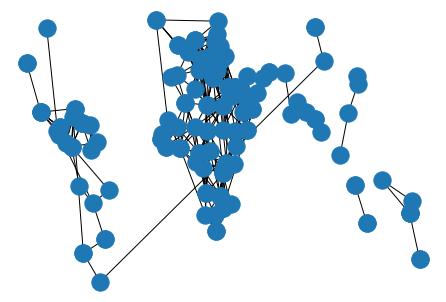

In [27]:
G= spatial_graph(nb_nodes = 150, nb_edges = 700,coords="country") #Coordinates from countries list
nx.draw(G,pos=nx.get_node_attributes(G,"pos"))

### Configuration models

To generate a graph based on the configuration model, use the ``powerlaw_graph`. Parameters are : 

* the powerlaw exponent value `exponent`
* the number of tries `tries`. It corresponds to the number of degree distribution generation until the correct number of nodes and edges is attained.

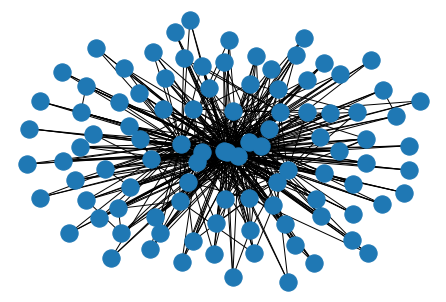

In [28]:
G= powerlaw_graph(nb_nodes= 100, nb_edges = 500)
nx.draw(G)

###  Mixed Model : Stochastic Block Model + Spatial Model

This model allows to generate a graph composed of alpha percent of edges based on stochastic block model and the rest (1-alpha) based on spatial model.

Parameters are :
* `nb_com` number of partition for the stochastic block model
* `percentage_edge_betw` percentage of edge with nodes from different partitions (stochastic block model parameters). 
* `alpha` percentage of the graph built with the stochastic block model
* `dist_func` distance function used by the spatial model


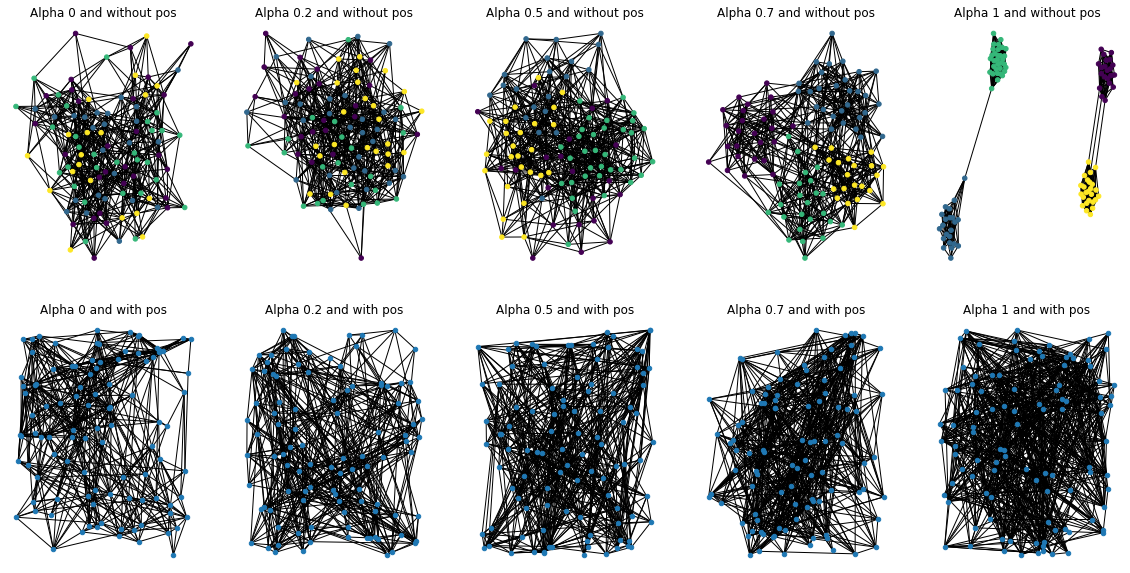

In [44]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(nrows=2,ncols=5,figsize=(20,10))

for ix,alpha in enumerate([0,0.2,0.5,0.7,1]):
  G= mixed_model_spat_sbm(nb_nodes= 100,nb_edges = 600,nb_com = 4,alpha=alpha)
  nx.draw(G,node_color=[v for k,v in nx.get_node_attributes(G,"block").items()],ax = axes[0][ix],node_size=20)
  nx.draw(G,pos=nx.get_node_attributes(G,"pos"),ax = axes[1][ix],node_size=20)
  axes[0][ix].set_title("Alpha {0} and without pos".format(alpha))
  axes[1][ix].set_title("Alpha {0} and with pos".format(alpha))
